# **Capitulo 2** - Entrenar algoritmos simples de aprendizaje automatico para clasificación

**Temas que se verán en este capítulo**
- Crear una intuición para algoritmos de aprendizaje automatico
- Utilizar pandas, NumPy, Matplotlib para leer, procesar y visualizar datos.
- Implementar algoritmos de clasificación lineal en Python

## Neuronas Artificiales 

Se trata de una formulación donde tenemos lo siguiente:

$ z = w_{0}x_{0} + w_{1}x_{1} + w_{2}x_{2} + w_{3}x_{3} + ... + w_{m}x_{m} = W^{T}X$

Donde:
- **w** es el peso asociado a la variable $ x_{m} $
- **x** es el valor de la variable de entrada $ x_{m} $
- **W** es el vector que contiene todos los pesos
- **X** es el vector de variables de entrada
- El superindice **T** se refiere a la **trasposición** de los vectores 

Adicional, se plantea un umbral para clasificar la salida, donde $\phi(z)$ será 1 si es mayor o igual al umbral o -1 si es menor al umbral.

Por lo general el peso inicial $w_{0} = -\theta$ se le conose como sesgo o bias

## Implementación de un Perceptron

Escribir el código del modelo para realizar la prueba

In [1]:
import numpy as np 

class Perceptron(object):
    def __init__(self,eta = 0.01,n_iter = 50, random_state = 1):
        self.eta = eta 
        self.n_iter = n_iter
        self.random_state = random_state
    
    def fit(self, X, y):
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc = 0.0, scale = 0.01, size = 1 + X.shape[1])
        self.errors_ = []
        for _ in range(self.n_iter):
            errors = 0
            for xi, target in zip(X,y):
                update = self.eta * (target - self.predict(xi))
                self.w_[1:] += update * xi
                self.w_[0] += update
                errors += int(update != 0.0)
            self.errors_.append(errors)
        return self 
    
    def net_input(self,X):
        return np.dot(X, self.w_[1:]) + self.w_[0]
    
    def predict(self,X):
        return np.where(self.net_input(X) >= 0.0, 1, -1)

## Cargar los datos de Iris para la prueba del modelo
Para este ejercicio solo utilizaremos las especies setosa y versicolor, donde setosa es -1 y versicolor es 1, adicional unicamente utilizaremos los atributos longitud del sepalo y longitud del pétalo

In [2]:
import pandas as pd
from sklearn.datasets import load_iris
iris = load_iris()
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_df['target'] = iris.target
iris_df['species'] = iris_df['target'].map({0: 'setosa', 1: 'versicolor', 2: 'virginica'})
iris_df = iris_df[iris_df['species'] != 'virginica']
iris_df['target'] = np.where(iris_df['species'] == 'setosa',-1,1)
del iris_df['species']
y = iris_df.iloc[:,4].values
X = iris_df.iloc[:,[0,2]].values
print('El arreglo X correspondiente a la longitud del sepalo y longitud del pétalo es:')
print(X[:5,:])
print('El target es:')
print(y[:5])

El arreglo X correspondiente a la longitud del sepalo y longitud del pétalo es:
[[5.1 1.4]
 [4.9 1.4]
 [4.7 1.3]
 [4.6 1.5]
 [5.  1.4]]
El target es:
[-1 -1 -1 -1 -1]


### Diagrama de dispersión

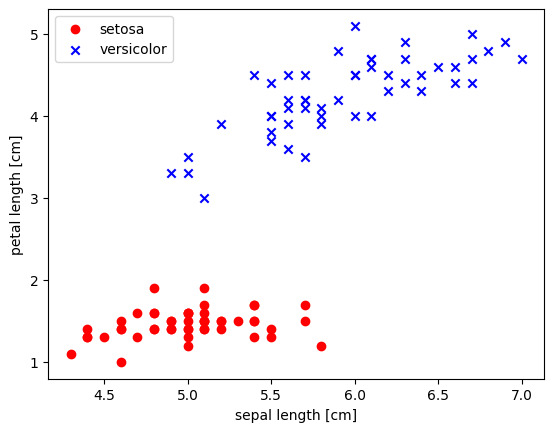

In [3]:
import matplotlib.pyplot as plt 
plt.scatter(X[:50,0],X[:50,1],color = 'red', marker = 'o', label = 'setosa')
plt.scatter(X[50:100,0],X[50:100,1],color = 'blue', marker = 'x',label = 'versicolor')
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc = 'upper left')
plt.show()

## Conclusiones de la gráfica anterior
- Los atributos "Longitud del pétalo" y "Longitud del sepalo" son suficientes para hacer una separación con un modelo lineal, como lo es el perceptron.
- Las setosas tienen una longitud menor en ambas medidas que versicolor 
- El diagrama anterior no tiene en cuenta las virginica por lo que podría ser diferente en ese caso 

## Entrenar el modelo del perceptron
Aunque vamos a omitir algunos pasos para este ejemplo, siempre debemos separar la muestra en testeo y entrenamiento, incluso separar el de entrenamiento en validación y entrenamiento, esto para realizar un metodo de validacion del modelo y optimizar parametros, metodos de limpieza y clasificador.

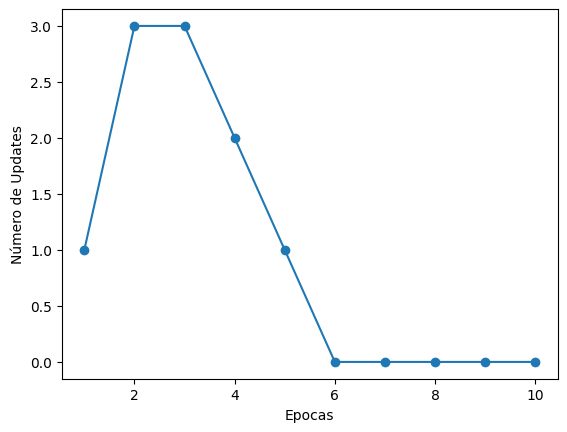

In [4]:
ppn = Perceptron(eta = 0.1, n_iter = 10)
ppn.fit(X,y)
plt.plot(range(1, len(ppn.errors_) + 1),ppn.errors_,marker = 'o')
plt.xlabel('Epocas')
plt.ylabel('Número de Updates')
plt.show()

## Visualizar los limites de decisión:

/var/folders/4v/0z_6t5c56zx21srml8k375s40000gn/T/ipykernel_3889/480829788.py:16: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x = X[y == cl,0], y = X[y == cl,1],alpha = 0.8,c = colors[idx],marker = markers[idx],label = cl, edgecolors = 'black')


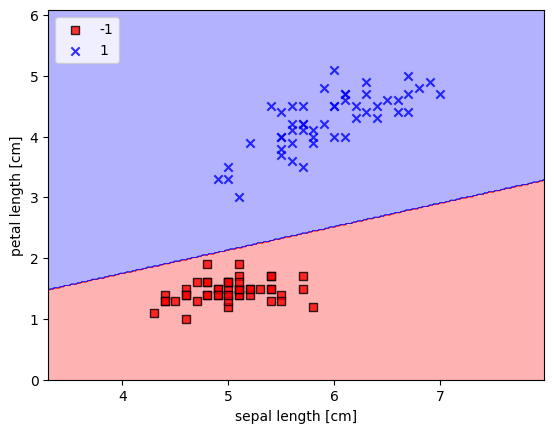

In [5]:
from matplotlib.colors import ListedColormap

def plot_decision_regions(X,y,classifier,resolution = 0.02):
    markers = ('s','x','o','^','v')
    colors = ('red','blue','lightgreen','gray','cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    x1_min, x1_max = X[:,0].min() - 1,X[:,0].max() + 1
    x2_min, x2_max = X[:,1].min() - 1,X[:,1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min,x1_max,resolution),np.arange(x2_min,x2_max,resolution))
    z = classifier.predict(np.array([xx1.ravel(),xx2.ravel()]).T)
    z = z.reshape(xx1.shape)
    plt.contourf(xx1,xx2,z,alpha = 0.3, cmap = cmap)
    plt.xlim(xx1.min(),xx1.max())
    plt.ylim(xx2.min(),xx2.max())
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x = X[y == cl,0], y = X[y == cl,1],alpha = 0.8,c = colors[idx],marker = markers[idx],label = cl, edgecolors = 'black')

plot_decision_regions(X, y, classifier = ppn)
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc = 'upper left')
plt.show()

## **Breve historia del clasificador Perceptron**

El perceptrón es un modelo básico de aprendizaje automático y fue propuesto por Frank Rosenblatt en 1957. La idea detrás del perceptrón se inspira en la forma en que las neuronas en el cerebro humano funcionan. Es un modelo de clasificación binaria que puede aprender a separar dos clases en un espacio de características.

Aquí hay una resumida historia del perceptrón:

1. **1957**: Frank Rosenblatt introduce el concepto de perceptrón como una máquina de aprendizaje de una sola capa. Rosenblatt desarrolló el algoritmo de entrenamiento del perceptrón, que ajusta los pesos de las entradas para hacer predicciones binarias.

2. **1960s-1970s**: A pesar de su capacidad para aprender funciones lineales, los perceptrones demostraron ser limitados en su capacidad para abordar problemas más complejos que no eran linealmente separables. Marvin Minsky y Seymour Papert publicaron un libro en 1969 llamado "Perceptrones", que señalaba estas limitaciones y desalentó el interés en los perceptrones en ese momento.

3. **Década de 1980 en adelante**: Aunque los perceptrones de una sola capa tienen limitaciones para abordar problemas no lineales, se descubrió que al apilar múltiples capas de perceptrones (redes neuronales) se podría superar esta limitación. Este enfoque condujo al renacimiento de las redes neuronales en el campo del aprendizaje profundo.

4. **1990s-2000s**: Con el tiempo, se desarrollaron algoritmos de entrenamiento más avanzados y se propusieron arquitecturas de redes neuronales más complejas. Sin embargo, durante este período, las redes neuronales no se utilizaron ampliamente debido a problemas de rendimiento y a la falta de grandes conjuntos de datos y potencia computacional.

5. **2010 en adelante**: Con el auge de grandes conjuntos de datos, mejoras en hardware (GPU) y avances en algoritmos de entrenamiento (como el algoritmo de retropropagación), las redes neuronales y el perceptrón multicapa han experimentado un resurgimiento masivo. Este período ha sido testigo de un auge en el interés y el éxito de las redes neuronales profundas, aplicadas en una variedad de campos, desde reconocimiento de imágenes hasta procesamiento del lenguaje natural.

En resumen, el perceptrón marcó el comienzo del campo de las redes neuronales, y aunque inicialmente se encontraron limitaciones, su importancia resurgió con la aparición de arquitecturas más complejas y enfoques de aprendizaje profundo en las últimas décadas.

## Adaline Model
Luego de una periodo donde se expusieron limitaciones del perceptron surgio dos conceptos importantes:
- Funcion de activación: Una transformación del modelo para poder sumar más neuronas entre ellas eliminando el componente lineal
- Desenso del gradiente: Un metodo que nos permite optimizar los pesos sin tener en cuenta las etiquetas predichas sino un numero continuo como respuesta antes de clasificar

In [6]:
class AdalineGD(object):
    def __init__(self, eta = 0.01, n_iter = 50, random_state = 1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state
    
    def fit(self,X,y):
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc = 0.0, scale = 0.01, size = 1 + X.shape[1])
        self.cost_ = []
        for i in range(self.n_iter):
            net_input = self.net_input(X)
            output = self.activation(net_input)
            errors = (y - output)
            self.w_[1:] += self.eta * X.T.dot(errors)
            self.w_[0] += self.eta * errors.sum()
            cost = (errors**2).sum()/2.0
            self.cost_.append(cost)
        return self
    
    def net_input(self,X):
        return np.dot(X, self.w_[1:]) + self.w_[0]
    
    def activation(self,X):
        return X # Activación lineal - no transformación
    
    def predict(self,X):
        return np.where(self.activation(self.net_input(X)) >= 0.0, 1, -1)

## Diagramas de la funcion de coste

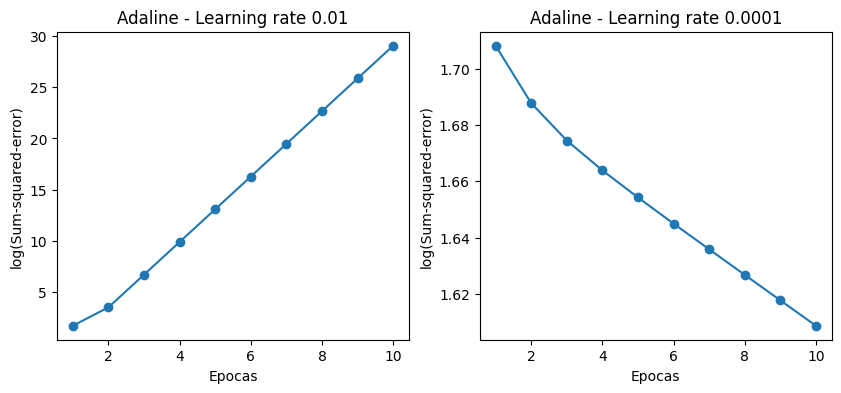

In [7]:
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (10,4))
ada1 = AdalineGD(n_iter = 10, eta = 0.01).fit(X,y)
ax[0].plot(range(1,len(ada1.cost_) + 1), np.log10(ada1.cost_),marker = 'o')
ax[0].set_xlabel('Epocas')
ax[0].set_ylabel('log(Sum-squared-error)')
ax[0].set_title('Adaline - Learning rate 0.01')
ada2 = AdalineGD(n_iter = 10, eta = 0.0001).fit(X,y)
ax[1].plot(range(1,len(ada2.cost_) + 1), np.log10(ada2.cost_),marker = 'o')
ax[1].set_xlabel('Epocas')
ax[1].set_ylabel('log(Sum-squared-error)')
ax[1].set_title('Adaline - Learning rate 0.0001')
plt.show()

### Conclusiones:
- El rango de aprendizaje o la letra griega &eta; es de gran importancia optimizarlo, al escoger un valor muy grande el modelo nunca encontrara el minimo local o global y quedara en un loop infinito
- Si el &eta; es pequeño, llegaremos al minimo local pero si ya es demasiado pequeño el aprendizaje será lento y demorado, consumiendo mas recursos
 

## Escalado de Caracteristicas - Mejora del desenso del gradiente

### **Normalización:** 
Proposionar a los datos la propiedad de una distribución normal estandar, esto para ayudar al desenso del gradiente a converger más rápidamente.

$x'_{j} = \frac{x_{j} - \mu_{j}}{\theta_{j}}$

Esto en código sería:

In [8]:
X_std = np.copy(X)
X_std[:,0] = (X[:,0] - X[:,0].mean())/X[:,0].std()
X_std[:,1] = (X[:,1] - X[:,1].mean())/X[:,1].std()

Con la normalización de los parametros de entrada, veremos que ahora utilizando Adeline, el modelo converge en un número de epocas menor, reduciendo el tiempo de ejecución y reduciendo el coste

/var/folders/4v/0z_6t5c56zx21srml8k375s40000gn/T/ipykernel_3889/480829788.py:16: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x = X[y == cl,0], y = X[y == cl,1],alpha = 0.8,c = colors[idx],marker = markers[idx],label = cl, edgecolors = 'black')


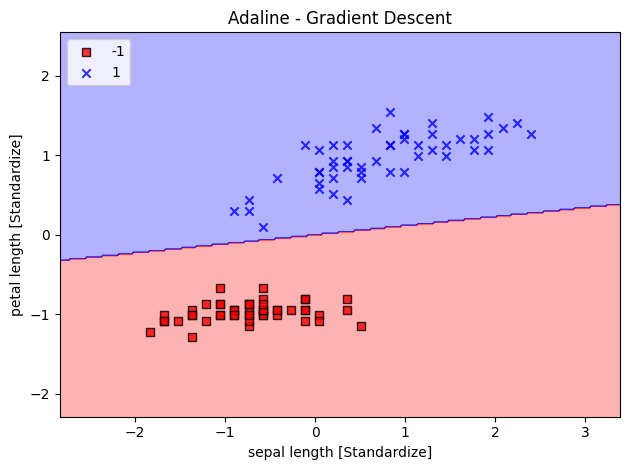

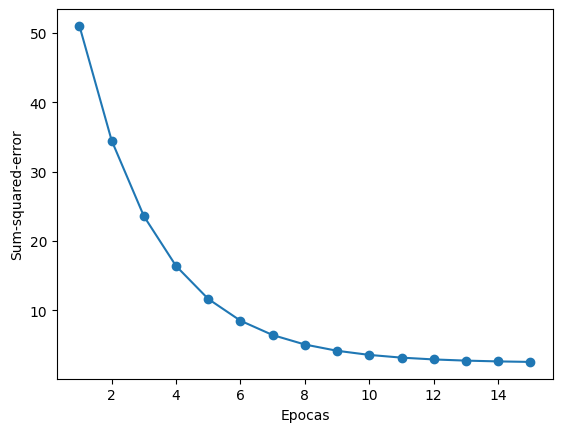

In [9]:
ada = AdalineGD(n_iter = 15,eta = 0.01)
ada.fit(X_std,y)

plot_decision_regions(X_std, y, classifier = ada)
plt.title('Adaline - Gradient Descent')
plt.xlabel('sepal length [Standardize]')
plt.ylabel('petal length [Standardize]')
plt.legend(loc = 'upper left')
plt.tight_layout()
plt.show()

plt.plot(range(1,len(ada.cost_) + 1),ada.cost_,marker = 'o')
plt.xlabel('Epocas')
plt.ylabel('Sum-squared-error')
plt.show()

**Conclusión:**
Anteriormente con un $ \eta $ igual a 0.01 el problema no convergía, sin embargo, normalizando las entradas el problema ahora converge.

### Decenso del gradiente estocastico

El descenso del gradiente anterior se conoce como descenso del gradiente por lotes, esto se debe a que se hace un único paso contrario al gradiente del coste, sin embargo, esta metodología anterior es computacionalmente  costoso y no muy funcional a la hora de tratar con datasets extensos.

Una solución es utilizar el descenso de gradiente estocastico, también conocido como descenso del gradiente online o iterativo. En este caso no actualizamos los pesos con base a la suma de los errores acumulados en todas las muestras $ x^{(i)} $, sino que actualizamos los pesos de forma incremental para cada muestra de entrenamiento, por lo que:

$ \eta(y^{(i)} - \phi(z^{(i)}))x^{(i)} $

In [17]:
# AdaLine usando Descenso del gradiente Estocastico
class AdalineSGD(object):
    def __init__(self,eta = 0.01,n_iter = 10, shuffle = True, random_state = None):
        self.eta = eta
        self.n_iter = n_iter
        self.w_initialized = False
        self.shuffle = shuffle
        self.random_state = random_state

    def fit(self,X,y):
        self._initialize_weights(X.shape[1])
        self.cost_ = []
        for i in range(self.n_iter):
            if self.shuffle:
                X, y = self._shuffle(X,y)
            cost = []
            for xi, target in zip(X,y):
                cost.append(self._update_weights(xi, target))
            avg_cost = sum(cost)/len(y)
            self.cost_.append(avg_cost)
        return self 
    
    def partial_fit(self, X, y):
        if not self.w_initialized:
            self._initialize_weights(X.shape[1])
        if y.ravel().shape[0] > 1:
            for xi, target in zip(X,y):
                self._update_weights(xi,target)
        else:
            self._update_weights(X,y)
        return self

    def _shuffle(self, X, y):
        r = self.rgen.permutation(len(y))
        return X[r],y[r]

    def _initialize_weights(self,m):
        self.rgen = np.random.RandomState(self.random_state)
        self.w_ = self.rgen.normal(loc = 0.0, scale = 0.01, size = 1 + m)
        self.w_initialized = True
    
    def _update_weights(self,xi,target):
        output = self.activation(self.net_input(xi))
        error = (target - output)
        self.w_[1:] += self.eta * xi.dot(error)
        self.w_[0] += self.eta * error
        cost = 0.5 * error**2
        return cost 
    
    def net_input(self, X):
        return np.dot(X,self.w_[1:]) + self.w_[0]
    
    def activation(self, X):
        return X 
    
    def predict(self, X):
        return np.where(self.activation(self.net_input(X)) >= 0.0,1,-1)

Ahora evaluamos el resultado:

/var/folders/4v/0z_6t5c56zx21srml8k375s40000gn/T/ipykernel_3889/480829788.py:16: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x = X[y == cl,0], y = X[y == cl,1],alpha = 0.8,c = colors[idx],marker = markers[idx],label = cl, edgecolors = 'black')


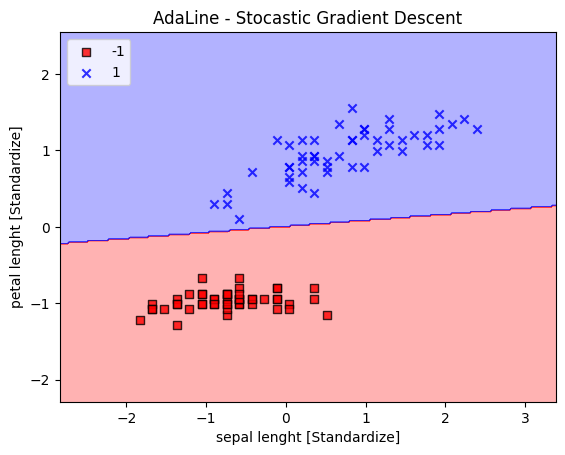

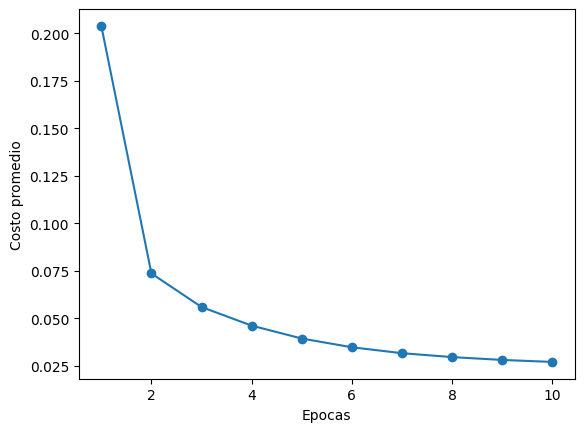

In [18]:
ada = AdalineSGD(n_iter = 10, eta = 0.01, random_state = 1)
ada.fit(X_std,y)

plot_decision_regions(X_std,y,classifier = ada)
plt.title('AdaLine - Stocastic Gradient Descent')
plt.xlabel('sepal lenght [Standardize]')
plt.ylabel('petal lenght [Standardize]')
plt.legend(loc = 'upper left')
plt.show()

plt.plot(range(1,len(ada.cost_) + 1), ada.cost_, marker = 'o')
plt.xlabel('Epocas')
plt.ylabel('Costo promedio')
plt.show()

## Resumen del capítulo

- Se vieron conceptos basicos de clasificadores lineales, sin aplicar funciones de activación que alteran la linealidad
- Vimos como funcionan los modelos de Perceptron y AdaLine, dos clasificadores que explican la teoría basica del entrenamiento supervisado, estos fueron el origen del Machine Learning
- Aprendimos el concepto del descenso del gradiente, y la diferencia del descenso del gradiente por lotes y estocastico.
- Aprendimos los comandos que se utilizan comunmente en SciKit-Learn, estos son **fit** y **predict**